In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import warnings
import pickle
warnings.filterwarnings("ignore")

In [3]:
heart=pd.read_csv(r"C:\Users\HP\Desktop\WebApp\heart_failure_clinical_records_dataset.csv")
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
heart.isnull().sum()  

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


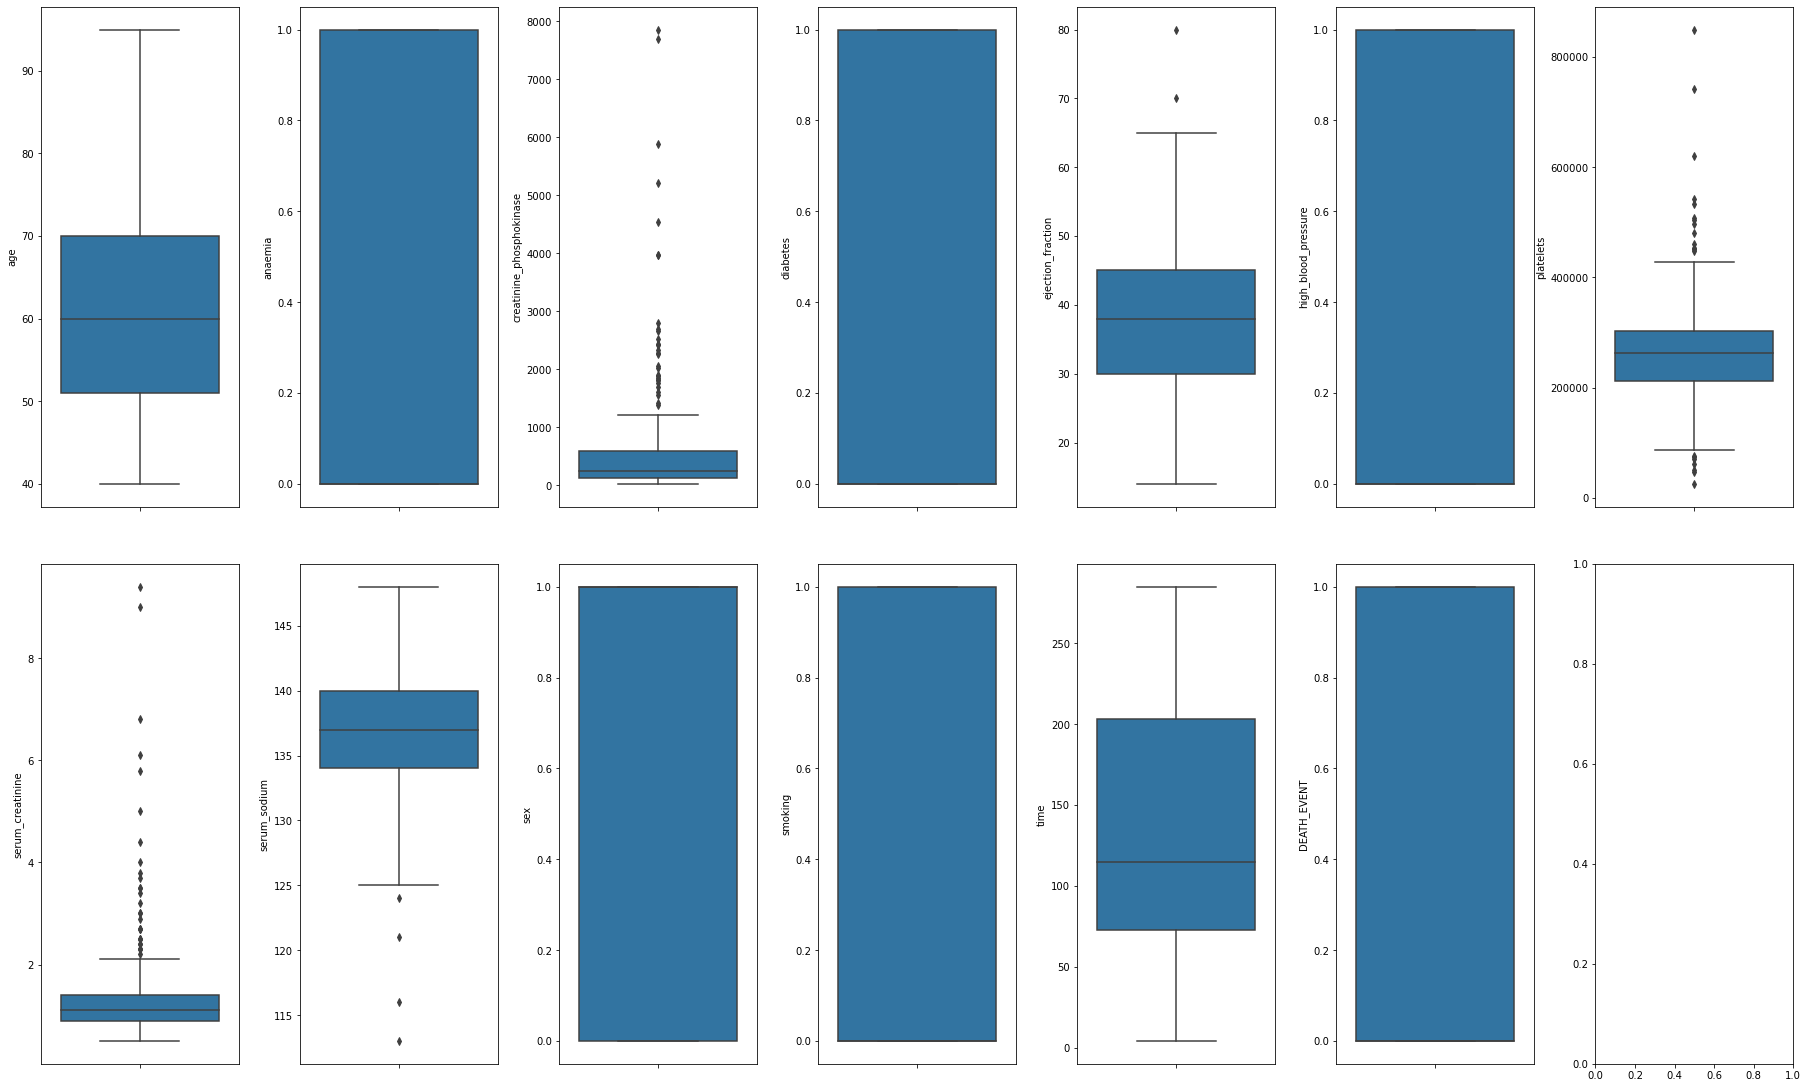

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(25, 15))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in heart.items():
    sb.boxplot(y=v, data=heart, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.3, w_pad=0.2, h_pad=5.0)

In [7]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020613989DC0>,
      dtype=object)

THERE ARE MANY OUTLIERS IN CREATININE PHOSPHOKINASE, PLATELETS & SERUM CREATININE. SO THEY ARE DROPPED.

In [8]:
heart = heart[~(heart['creatinine_phosphokinase'] >= 5000.0)]
print(np.shape(heart))

(295, 13)


In [9]:
heart = heart[~(heart['platelets'] >= 600000.0)]
print(np.shape(heart))

(292, 13)


In [10]:
heart = heart[~(heart['serum_creatinine'] >= 7.0)]
print(np.shape(heart))

(290, 13)


In [11]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,60.918393,0.434483,496.848276,0.420690,38.031034,0.348276,258171.354207,1.346448,136.606897,0.648276,0.313793,131.251724,0.310345
std,11.749592,0.496546,651.606344,0.494523,11.751275,0.477248,85154.142723,0.822084,4.447769,0.478334,0.464836,77.259071,0.463434
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211250.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,245.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,117.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,4540.000000,1.000000,80.000000,1.000000,543000.000000,6.800000,148.000000,1.000000,1.000000,285.000000,1.000000


In [12]:
heart[['anaemia','DEATH_EVENT']].groupby(['anaemia'],as_index=False).mean()

,anaemia,DEATH_EVENT
0,0,0.286585
1,1,0.341270


In [13]:
heart[['diabetes','DEATH_EVENT']].groupby(['diabetes'],as_index=False).mean()

,diabetes,DEATH_EVENT
0,0,0.303571
1,1,0.319672


In [14]:
heart[['high_blood_pressure','DEATH_EVENT']].groupby(['high_blood_pressure'],as_index=False).mean()

,high_blood_pressure,DEATH_EVENT
0,0,0.291005
1,1,0.346535


In [15]:
heart[['serum_creatinine','DEATH_EVENT']].groupby(['serum_creatinine'],as_index=False).mean()

,serum_creatinine,DEATH_EVENT
0,0.50,0.000000
1,0.60,0.500000
2,0.70,0.052632
3,0.75,0.000000
4,0.80,0.043478
5,0.90,0.156250
6,1.00,0.276596
7,1.10,0.258065
8,1.18,0.000000
9,1.20,0.375000


In [16]:
heart[['sex','DEATH_EVENT']].groupby(['sex'],as_index=False).mean()

,sex,DEATH_EVENT
0,0,0.313725
1,1,0.308511


In [17]:
heart[['smoking','DEATH_EVENT']].groupby(['smoking'],as_index=False).mean()

,smoking,DEATH_EVENT
0,0,0.316583
1,1,0.296703


In [18]:
heart['age_band'] = pd.cut(heart['age'],5)

In [19]:
heart[['age_band','DEATH_EVENT']].groupby('age_band',as_index=False).mean()

,age_band,DEATH_EVENT
0,"(39.945, 51.0]",0.256757
1,"(51.0, 62.0]",0.258065
2,"(62.0, 73.0]",0.285714
3,"(73.0, 84.0]",0.538462
4,"(84.0, 95.0]",0.692308


In [20]:
heart.loc[(heart['age']>0) & (heart['age']<=51), 'age']=0
heart.loc[(heart['age']>51) & (heart['age']<=62), 'age']=1
heart.loc[(heart['age']>62) & (heart['age']<=73), 'age']=2
heart.loc[(heart['age']>73) & (heart['age']<=84), 'age']=3
heart.loc[(heart['age']>84) & (heart['age']<=95), 'age']=4
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band
0,3.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,"(73.0, 84.0]"
2,2.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,"(62.0, 73.0]"
3,0.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,"(39.945, 51.0]"
4,2.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,"(62.0, 73.0]"
5,4.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,"(84.0, 95.0]"


In [21]:
heart['phospho_band']=pd.cut(heart['creatinine_phosphokinase'],5)

In [22]:
heart[['phospho_band','DEATH_EVENT']].groupby('phospho_band',as_index=False).mean()

,phospho_band,DEATH_EVENT
0,"(18.483, 926.4]",0.317647
1,"(926.4, 1829.8]",0.210526
2,"(1829.8, 2733.2]",0.333333
3,"(2733.2, 3636.6]",0.000000
4,"(3636.6, 4540.0]",0.333333


In [23]:
heart.loc[(heart['creatinine_phosphokinase']>0) & (heart['creatinine_phosphokinase']<=926), 'creatinine_phosphokinase']=0
heart.loc[(heart['creatinine_phosphokinase']>926) & (heart['creatinine_phosphokinase']<=1829), 'creatinine_phosphokinase']=1
heart.loc[(heart['creatinine_phosphokinase']>1829) & (heart['creatinine_phosphokinase']<=2733), 'creatinine_phosphokinase']=2
heart.loc[(heart['creatinine_phosphokinase']>2733) & (heart['creatinine_phosphokinase']<=3636), 'creatinine_phosphokinase']=3
heart.loc[(heart['creatinine_phosphokinase']>3636) & (heart['creatinine_phosphokinase']<=4540), 'creatinine_phosphokinase']=4
heart.loc[heart['creatinine_phosphokinase']>4540, 'creatinine_phosphokinase']=5
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band,phospho_band
0,3.0,0,0,0,20,1,265000.0,1.9,130,1,0,4,1,"(73.0, 84.0]","(18.483, 926.4]"
2,2.0,0,0,0,20,0,162000.0,1.3,129,1,1,7,1,"(62.0, 73.0]","(18.483, 926.4]"
3,0.0,1,0,0,20,0,210000.0,1.9,137,1,0,7,1,"(39.945, 51.0]","(18.483, 926.4]"
4,2.0,1,0,1,20,0,327000.0,2.7,116,0,0,8,1,"(62.0, 73.0]","(18.483, 926.4]"
5,4.0,1,0,0,40,1,204000.0,2.1,132,1,1,8,1,"(84.0, 95.0]","(18.483, 926.4]"


In [24]:
heart['ejection_band']=pd.cut(heart['ejection_fraction'],5)

In [25]:
heart[['ejection_band','DEATH_EVENT']].groupby(['ejection_band'],as_index=False).mean()

,ejection_band,DEATH_EVENT
0,"(13.934, 27.2]",0.637931
1,"(27.2, 40.4]",0.227273
2,"(40.4, 53.6]",0.268293
3,"(53.6, 66.8]",0.194444
4,"(66.8, 80.0]",0.000000


In [26]:
heart.loc[(heart['ejection_fraction']>0) & (heart['ejection_fraction']<=27), 'ejection_fraction']=0
heart.loc[(heart['ejection_fraction']>27) & (heart['ejection_fraction']<=40), 'ejection_fraction']=1
heart.loc[(heart['ejection_fraction']>40) & (heart['ejection_fraction']<=53), 'ejection_fraction']=2
heart.loc[(heart['ejection_fraction']>53) & (heart['ejection_fraction']<=66), 'ejection_fraction']=3
heart.loc[(heart['ejection_fraction']>66) & (heart['ejection_fraction']<=80), 'ejection_fraction']=4
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band,phospho_band,ejection_band
0,3.0,0,0,0,0,1,265000.0,1.9,130,1,0,4,1,"(73.0, 84.0]","(18.483, 926.4]","(13.934, 27.2]"
2,2.0,0,0,0,0,0,162000.0,1.3,129,1,1,7,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]"
3,0.0,1,0,0,0,0,210000.0,1.9,137,1,0,7,1,"(39.945, 51.0]","(18.483, 926.4]","(13.934, 27.2]"
4,2.0,1,0,1,0,0,327000.0,2.7,116,0,0,8,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]"
5,4.0,1,0,0,1,1,204000.0,2.1,132,1,1,8,1,"(84.0, 95.0]","(18.483, 926.4]","(27.2, 40.4]"


In [27]:
heart['platelets_band']=pd.cut(heart['platelets'],5)

In [28]:
heart[['platelets_band','DEATH_EVENT']].groupby(['platelets_band'],as_index=False).mean()

,platelets_band,DEATH_EVENT
0,"(24582.1, 128680.0]",0.571429
1,"(128680.0, 232260.0]",0.322917
2,"(232260.0, 335840.0]",0.270073
3,"(335840.0, 439420.0]",0.312500
4,"(439420.0, 543000.0]",0.363636


In [29]:
heart.loc[(heart['platelets']>0.0) & (heart['platelets']<=128680.0), 'platelets']=0
heart.loc[(heart['platelets']>128680.0) & (heart['platelets']<=232260.0), 'platelets']=1
heart.loc[(heart['platelets']>232260.0) & (heart['platelets']<=335840.0), 'platelets']=2
heart.loc[(heart['platelets']>335840.0) & (heart['platelets']<=439420.0), 'platelets']=3
heart.loc[(heart['platelets']>439420.0) & (heart['platelets']<=543000.0), 'platelets']=4
heart.loc[heart['platelets']>543000.0, 'platelets']=5
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band,phospho_band,ejection_band,platelets_band
0,3.0,0,0,0,0,1,2.0,1.9,130,1,0,4,1,"(73.0, 84.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]"
2,2.0,0,0,0,0,0,1.0,1.3,129,1,1,7,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]"
3,0.0,1,0,0,0,0,1.0,1.9,137,1,0,7,1,"(39.945, 51.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]"
4,2.0,1,0,1,0,0,2.0,2.7,116,0,0,8,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]"
5,4.0,1,0,0,1,1,1.0,2.1,132,1,1,8,1,"(84.0, 95.0]","(18.483, 926.4]","(27.2, 40.4]","(128680.0, 232260.0]"


In [30]:
heart['sodium_band']=pd.cut(heart['serum_sodium'],5)

In [31]:
heart[['sodium_band','DEATH_EVENT']].groupby(['sodium_band'],as_index=False).mean()

,sodium_band,DEATH_EVENT
0,"(112.965, 120.0]",0.500000
1,"(120.0, 127.0]",0.714286
2,"(127.0, 134.0]",0.472222
3,"(134.0, 141.0]",0.222222
4,"(141.0, 148.0]",0.344828


In [32]:
heart.loc[(heart['serum_sodium']>0.0) & (heart['serum_sodium']<=120.0), 'serum_sodium']=0
heart.loc[(heart['serum_sodium']>120.0) & (heart['serum_sodium']<=127.0), 'serum_sodium']=1
heart.loc[(heart['serum_sodium']>127.0) & (heart['serum_sodium']<=134.0), 'serum_sodium']=2
heart.loc[(heart['serum_sodium']>134.0) & (heart['serum_sodium']<=141.0), 'serum_sodium']=3
heart.loc[(heart['serum_sodium']>141.0) & (heart['serum_sodium']<=148.0), 'serum_sodium']=4
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band,phospho_band,ejection_band,platelets_band,sodium_band
0,3.0,0,0,0,0,1,2.0,1.9,2,1,0,4,1,"(73.0, 84.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]","(127.0, 134.0]"
2,2.0,0,0,0,0,0,1.0,1.3,2,1,1,7,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]","(127.0, 134.0]"
3,0.0,1,0,0,0,0,1.0,1.9,3,1,0,7,1,"(39.945, 51.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]","(134.0, 141.0]"
4,2.0,1,0,1,0,0,2.0,2.7,0,0,0,8,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]","(112.965, 120.0]"
5,4.0,1,0,0,1,1,1.0,2.1,2,1,1,8,1,"(84.0, 95.0]","(18.483, 926.4]","(27.2, 40.4]","(128680.0, 232260.0]","(127.0, 134.0]"


In [33]:
heart['time_band']=pd.cut(heart['time'],5)

In [34]:
heart[['time_band','DEATH_EVENT']].groupby(['time_band'],as_index=False).mean()

,time_band,DEATH_EVENT
0,"(3.719, 60.2]",0.850000
1,"(60.2, 116.4]",0.238095
2,"(116.4, 172.6]",0.289474
3,"(172.6, 228.8]",0.089552
4,"(228.8, 285.0]",0.048780


In [35]:
heart.loc[(heart['time']>0) & (heart['time']<=60), 'time']=0
heart.loc[(heart['time']>60) & (heart['time']<=116), 'time']=1
heart.loc[(heart['time']>116) & (heart['time']<=172), 'time']=2
heart.loc[(heart['time']>172) & (heart['time']<=228), 'time']=3
heart.loc[(heart['time']>228) & (heart['time']<=285), 'time']=4
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_band,phospho_band,ejection_band,platelets_band,sodium_band,time_band
0,3.0,0,0,0,0,1,2.0,1.9,2,1,0,0,1,"(73.0, 84.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]","(127.0, 134.0]","(3.719, 60.2]"
2,2.0,0,0,0,0,0,1.0,1.3,2,1,1,0,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]","(127.0, 134.0]","(3.719, 60.2]"
3,0.0,1,0,0,0,0,1.0,1.9,3,1,0,0,1,"(39.945, 51.0]","(18.483, 926.4]","(13.934, 27.2]","(128680.0, 232260.0]","(134.0, 141.0]","(3.719, 60.2]"
4,2.0,1,0,1,0,0,2.0,2.7,0,0,0,0,1,"(62.0, 73.0]","(18.483, 926.4]","(13.934, 27.2]","(232260.0, 335840.0]","(112.965, 120.0]","(3.719, 60.2]"
5,4.0,1,0,0,1,1,1.0,2.1,2,1,1,0,1,"(84.0, 95.0]","(18.483, 926.4]","(27.2, 40.4]","(128680.0, 232260.0]","(127.0, 134.0]","(3.719, 60.2]"


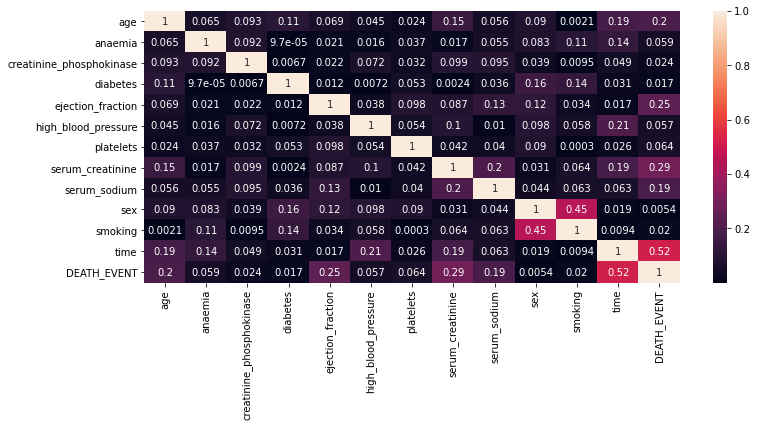

In [36]:
fig, corr = plt.subplots(figsize=(12,5))
sb.heatmap(heart.corr().abs(), annot=True)

In [37]:
heart.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.064638,-0.092581,-0.112196,0.068870,0.045361,0.023679,0.154893,-0.056324,0.089694,0.002094,-0.186835,0.196154
anaemia,0.064638,1.000000,-0.091627,-0.000097,0.021394,0.016313,-0.037394,-0.016635,0.055122,-0.082789,-0.113004,-0.137591,0.058592
creatinine_phosphokinase,-0.092581,-0.091627,1.000000,0.006732,-0.021900,-0.072080,-0.032459,0.098646,0.094763,0.039438,0.009549,0.048503,-0.023945
diabetes,-0.112196,-0.000097,0.006732,1.000000,0.012275,-0.007179,0.052791,-0.002440,-0.036022,-0.162219,-0.139731,0.031287,0.017181
ejection_fraction,0.068870,0.021394,-0.021900,0.012275,1.000000,0.038158,0.097658,-0.087103,0.131828,-0.123731,-0.034279,-0.016583,-0.245593
high_blood_pressure,0.045361,0.016313,-0.072080,-0.007179,0.038158,1.000000,0.054117,-0.101082,0.010049,-0.098158,-0.057604,-0.205170,0.057184
platelets,0.023679,-0.037394,-0.032459,0.052791,0.097658,0.054117,1.000000,-0.042002,0.040493,-0.089893,-0.000300,0.025731,-0.063562
serum_creatinine,0.154893,-0.016635,0.098646,-0.002440,-0.087103,-0.101082,-0.042002,1.000000,-0.202673,0.030866,-0.063990,-0.186108,0.289360
serum_sodium,-0.056324,0.055122,0.094763,-0.036022,0.131828,0.010049,0.040493,-0.202673,1.000000,-0.044293,0.063228,0.063286,-0.191813
sex,0.089694,-0.082789,0.039438,-0.162219,-0.123731,-0.098158,-0.089893,0.030866,-0.044293,1.000000,0.451412,0.019262,-0.005383


In [38]:
X=heart.iloc[:,:12]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,3.0,0,0,0,0,1,2.0,1.9,2,1,0,0
2,2.0,0,0,0,0,0,1.0,1.3,2,1,1,0
3,0.0,1,0,0,0,0,1.0,1.9,3,1,0,0
4,2.0,1,0,1,0,0,2.0,2.7,0,0,0,0
5,4.0,1,0,0,1,1,1.0,2.1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
293,2.0,1,0,1,1,0,1.0,0.9,3,1,1,4
294,1.0,0,0,1,1,1,1.0,1.1,4,1,1,4
295,1.0,0,1,0,1,0,2.0,1.2,3,0,0,4
297,0.0,0,2,0,1,0,1.0,1.4,3,1,1,4


In [39]:
Y=heart.iloc[:,12]
Y

0      1
2      1
3      1
4      1
5      1
      ..
293    0
294    0
295    0
297    0
298    0
Name: DEATH_EVENT, Length: 290, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
log=LogisticRegression()

In [42]:
log.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=log.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [44]:
y_test

57     0
131    0
188    0
218    0
279    0
47     1
282    0
220    1
17     1
24     1
129    0
125    0
14     0
257    0
66     1
284    0
236    0
146    0
189    0
133    0
166    0
247    0
85     0
227    0
288    0
263    0
96     0
238    0
216    0
231    0
123    0
10     1
6      1
221    0
229    0
255    0
173    0
261    0
8      1
67     1
77     0
167    1
141    0
215    0
234    0
144    1
163    1
290    0
78     0
280    0
62     0
291    0
283    0
117    0
118    0
244    0
107    0
22     1
Name: DEATH_EVENT, dtype: int64

In [45]:
s=accuracy_score(y_pred,y_test)
print("Accuracy Rate: {:.2f}%".format(100*s))

Accuracy Rate: 81.03%


In [46]:
log.score(x_train,y_train)

0.8405172413793104

In [47]:
inputt=[float(x) for x in "2.0 1 0 1 0 0 1.0 2.7 0 0 0 0".split(' ')]
final=[np.array(inputt)]

In [48]:
b = log.predict_proba(final)

In [49]:
pickle.dump(log,open('heart_model.pkl','wb'))
model=pickle.load(open('heart_model.pkl','rb'))

In [50]:
confusion_matrix(y_pred,y_test)

array([[37,  3],
       [ 8, 10]], dtype=int64)

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.77      0.56      0.65        18

    accuracy                           0.81        58
   macro avg       0.80      0.74      0.76        58
weighted avg       0.81      0.81      0.80        58



In [52]:
log.predict([[2.0,1,0,1,0,0,1.0,2.7,0,0,0,0]])  #for predicting new value

array([1], dtype=int64)

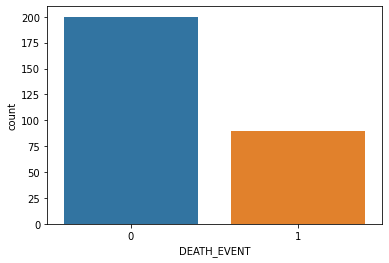

In [53]:
sb.countplot(heart['DEATH_EVENT'])

WE ALSO USED NAIVE BIAS IN THIS DATASET, BUT IN THAT CASE THE ACCURACY RATE HAS DROPPED TO 75%.
SO, LOGISTIC REGRESSION WAS THE IDEAL ONE TO BE USED HERE.